# Modules

In [1]:
import json
from glob import glob
from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from proj.conf import abstract, introduction
from proj.promptfoo import read_results

# Get list of outputs for each model

In [2]:
INPUT_DIR = abstract.CASES / "phenoplier" / "outputs"
assert INPUT_DIR.exists
display(INPUT_DIR)

PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs')

In [3]:
INPUT_MODELS = sorted(list(INPUT_DIR.glob("*")))

In [4]:
INPUT_MODELS

[PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/claude-3-haiku-20240307'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/claude-3-opus-20240229'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/claude-3-sonnet-20240229'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/gemma-2b-instruct-fp16'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/gpt-3.5-turbo-0125'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/gpt-4-0613'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/gpt-4-turbo-2024-04-09'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor

# Read all results

In [5]:
results = []
for model in INPUT_MODELS:
    model_results = read_results(model)
    results.append(model_results)

In [6]:
len(results)

16

In [7]:
results = pd.concat(results, ignore_index=True)

In [8]:
results.shape

(6720, 10)

In [9]:
results.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting


In [10]:
results["model"].value_counts()

model
claude-3-haiku-20240307             420
claude-3-opus-20240229              420
claude-3-sonnet-20240229            420
gemma-2b-instruct-fp16              420
gpt-3.5-turbo-0125                  420
gpt-4-0613                          420
gpt-4-turbo-2024-04-09              420
llama2-7b-chat-fp16                 420
llama3-70b-instruct-q5_1            420
llama3-8b-instruct-fp16             420
mistral-7b-instruct-fp16            420
mistral-7b-instruct-v0.2-fp16       420
mixtral-8x22b-instruct-v0.1-q5_1    420
mixtral-8x7b-instruct-v0.1-q8_0     420
starling-lm-7b-alpha-fp16           420
starling-lm-7b-beta-fp16            420
Name: count, dtype: int64

In [11]:
results["prompt"].value_counts()

prompt
baseline                   2240
candidate_with_metadata    2240
candidate                  2240
Name: count, dtype: int64

In [12]:
results["test_description"].value_counts()

test_description
Has no spelling errors                 1680
Starts with background                 1680
Describes method before results        1680
Ends with interpretation of results    1680
Name: count, dtype: int64

In [13]:
results["comp_type"].value_counts()

comp_type
Formatting          5760
Structure            720
Spelling/grammar     240
Name: count, dtype: int64

In [14]:
results["comp_desc"].value_counts()

comp_desc
Starts with capital letter                            960
Ends with a period                                    960
Is a single paragraph                                 960
Doesn't include manuscript title                      960
Doesn't reference authors, keywords, abstract, etc    960
Has roughly the same length as input                  960
Has no spelling errors                                240
Starts with background                                240
Describes method before results                       240
Ends with interpretation of results                   240
Name: count, dtype: int64

# Plot: pass rate

In [15]:
results.groupby(["model", "prompt"]).count()

passed  score_avg  \
model                            prompt                                       
claude-3-haiku-20240307          baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
claude-3-opus-20240229           baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
claude-3-sonnet-20240229         baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
gemma-2b-instruct-fp16           baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
gpt-3.5-turbo-0125               baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
gpt-4-0613                       baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
gpt-4-turbo-2024-04-09           baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
llama2-7b-chat-fp16              baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
llama3-70b-instruct-q5_1         baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
llama3-8b-instruct-fp16          baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
mistral-7b-instruct-fp16         baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
mistral-7b-instruct-v0.2-fp16    baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
mixtral-8x22b-instruct-v0.1-q5_1 baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
mixtral-8x7b-instruct-v0.1-q8_0  baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
starling-lm-7b-alpha-fp16        baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
starling-lm-7b-beta-fp16         baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   

                                                          test_description  \
model                        

## Prompt: `candidate_with_metadata`

In [16]:
pass_rate = (
    results[results["prompt"].isin(("candidate_with_metadata",))]
    .groupby(["model"])["passed"]
    .sum()
    .to_frame()
)

In [17]:
pass_rate = pass_rate.assign(pass_rate=lambda x: x / 140.0)

In [18]:
pass_rate.shape

(16, 2)

In [19]:
pass_rate.head()

,passed,pass_rate
model,,
claude-3-haiku-20240307,77,0.55
claude-3-opus-20240229,140,1.00
claude-3-sonnet-20240229,91,0.65
gemma-2b-instruct-fp16,0,0.00
gpt-3.5-turbo-0125,84,0.60


In [20]:
pass_rate.sort_values("pass_rate")

,passed,pass_rate
model,,
gemma-2b-instruct-fp16,0,0.00
llama3-70b-instruct-q5_1,0,0.00
llama3-8b-instruct-fp16,0,0.00
starling-lm-7b-beta-fp16,0,0.00
mistral-7b-instruct-v0.2-fp16,7,0.05
llama2-7b-chat-fp16,56,0.40
claude-3-haiku-20240307,77,0.55
gpt-3.5-turbo-0125,84,0.60
claude-3-sonnet-20240229,91,0.65


In [21]:
sorted_models = (
    pass_rate.sort_values("pass_rate").index.get_level_values("model").tolist()
)

In [22]:
sorted_models[-5:]

['mistral-7b-instruct-fp16',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09']

In [23]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [24]:
# sorted_models[-5:]

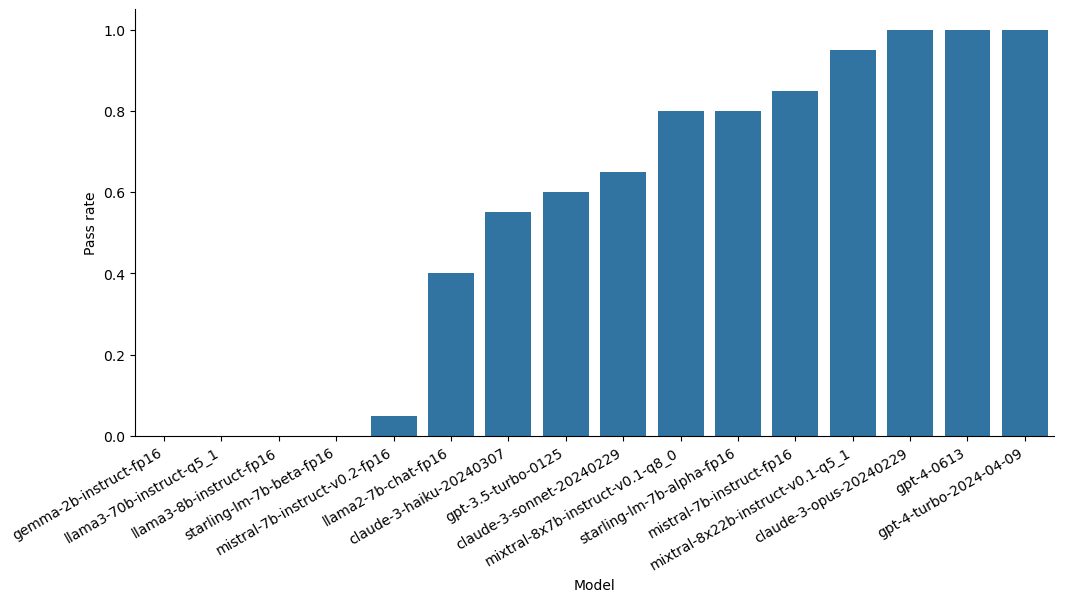

In [25]:
g = sns.catplot(
    data=pass_rate,
    x="model",
    y="pass_rate",
    # hue="prompt",
    kind="bar",
    order=sorted_models,
    errorbar=None,
    aspect=2,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Pass rate")

## Prompt: `candidate`

In [26]:
pass_rate = (
    results[results["prompt"].isin(("candidate",))]
    .groupby(["model"])["passed"]
    .sum()
    .to_frame()
)

In [27]:
pass_rate = pass_rate.assign(pass_rate=lambda x: x / 140.0)

In [28]:
pass_rate.shape

(16, 2)

In [29]:
pass_rate.head()

,passed,pass_rate
model,,
claude-3-haiku-20240307,77,0.55
claude-3-opus-20240229,140,1.00
claude-3-sonnet-20240229,98,0.70
gemma-2b-instruct-fp16,0,0.00
gpt-3.5-turbo-0125,91,0.65


In [30]:
pass_rate.sort_values("pass_rate")

,passed,pass_rate
model,,
gemma-2b-instruct-fp16,0,0.00
llama3-70b-instruct-q5_1,0,0.00
llama3-8b-instruct-fp16,0,0.00
starling-lm-7b-beta-fp16,0,0.00
mistral-7b-instruct-v0.2-fp16,7,0.05
mistral-7b-instruct-fp16,63,0.45
claude-3-haiku-20240307,77,0.55
starling-lm-7b-alpha-fp16,77,0.55
llama2-7b-chat-fp16,84,0.60


In [31]:
sorted_models = (
    pass_rate.sort_values("pass_rate").index.get_level_values("model").tolist()
)

In [32]:
sorted_models[-5:]

['mixtral-8x7b-instruct-v0.1-q8_0',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q5_1']

In [33]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [34]:
# sorted_models[-5:]

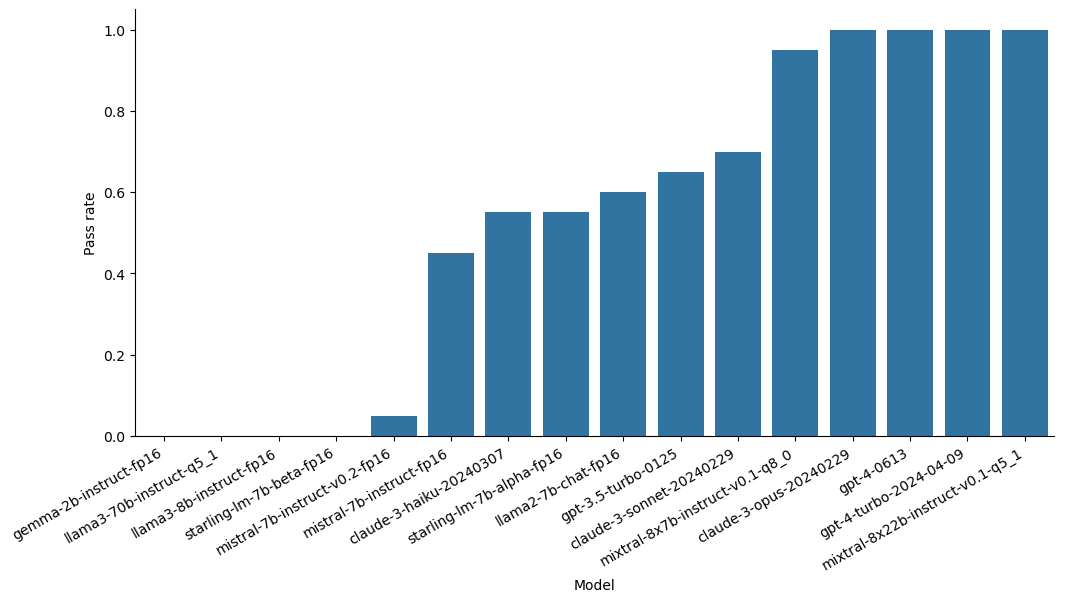

In [35]:
g = sns.catplot(
    data=pass_rate,
    x="model",
    y="pass_rate",
    # hue="prompt",
    kind="bar",
    order=sorted_models,
    errorbar=None,
    aspect=2,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Pass rate")

# Plot: pass rate by prompt

In [36]:
results

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting
...,...,...,...,...,...,...,...,...,...,...
6715,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,False,0.00,Failed,Is a single paragraph,Formatting
6716,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,Doesn't include manuscript title,Formatting
6717,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting
6718,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,Has roughly the same length as input,Formatting


In [37]:
results.groupby(["model", "prompt"]).count()

passed  score_avg  \
model                            prompt                                       
claude-3-haiku-20240307          baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
claude-3-opus-20240229           baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
claude-3-sonnet-20240229         baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
gemma-2b-instruct-fp16           baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
gpt-3.5-turbo-0125               baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
gpt-4-0613                       baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
gpt-4-turbo-2024-04-09           baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
llama2-7b-chat-fp16              baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
llama3-70b-instruct-q5_1         baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
llama3-8b-instruct-fp16          baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
mistral-7b-instruct-fp16         baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
mistral-7b-instruct-v0.2-fp16    baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
mixtral-8x22b-instruct-v0.1-q5_1 baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
mixtral-8x7b-instruct-v0.1-q8_0  baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
starling-lm-7b-alpha-fp16        baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
starling-lm-7b-beta-fp16         baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   

                                                          test_description  \
model                        

In [38]:
pass_rate = (
    results[results["prompt"] != "baseline"]
    .groupby(["model", "prompt"])["passed"]
    .sum()
    .to_frame()
)

In [39]:
pass_rate = pass_rate.assign(pass_rate=lambda x: x / 140.0).reset_index()

In [40]:
pass_rate.shape

(32, 4)

In [41]:
pass_rate.head()

,model,prompt,passed,pass_rate
0,claude-3-haiku-20240307,candidate,77,0.55
1,claude-3-haiku-20240307,candidate_with_metadata,77,0.55
2,claude-3-opus-20240229,candidate,140,1.00
3,claude-3-opus-20240229,candidate_with_metadata,140,1.00
4,claude-3-sonnet-20240229,candidate,98,0.70


In [42]:
pass_rate.sort_values("pass_rate")

,model,prompt,passed,pass_rate
31,starling-lm-7b-beta-fp16,candidate_with_metadata,0,0.00
19,llama3-8b-instruct-fp16,candidate_with_metadata,0,0.00
18,llama3-8b-instruct-fp16,candidate,0,0.00
17,llama3-70b-instruct-q5_1,candidate_with_metadata,0,0.00
6,gemma-2b-instruct-fp16,candidate,0,0.00
7,gemma-2b-instruct-fp16,candidate_with_metadata,0,0.00
16,llama3-70b-instruct-q5_1,candidate,0,0.00
30,starling-lm-7b-beta-fp16,candidate,0,0.00
23,mistral-7b-instruct-v0.2-fp16,candidate_with_metadata,7,0.05
22,mistral-7b-instruct-v0.2-fp16,candidate,7,0.05


In [43]:
sorted_models = (
    pass_rate[pass_rate["prompt"] == "candidate_with_metadata"]
    .sort_values("pass_rate")["model"]
    .tolist()
)

In [44]:
sorted_models[-5:]

['mistral-7b-instruct-fp16',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09']

In [45]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [46]:
# sorted_models[-5:]

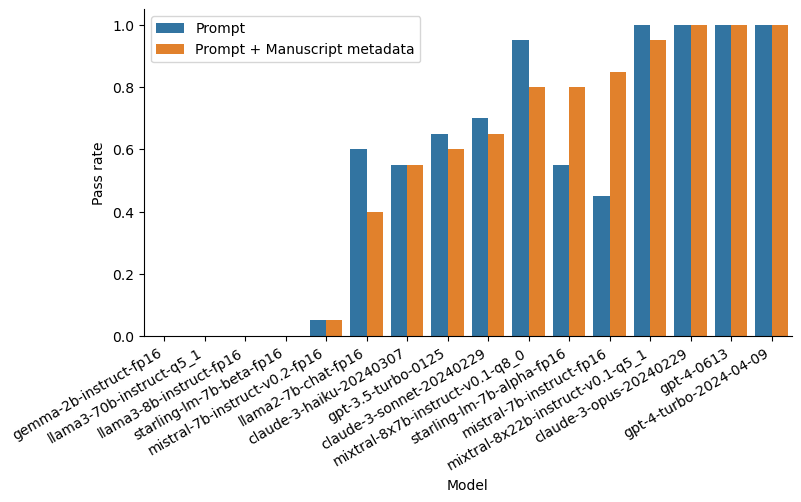

In [47]:
g = sns.catplot(
    data=pass_rate,
    x="model",
    y="pass_rate",
    hue="prompt",
    kind="bar",
    order=sorted_models,
    errorbar=None,
    height=4,
    aspect=2,
    legend_out=False,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Pass rate")

leg = g.axes.flat[0].get_legend()
leg.set_title("")
new_labels = ["Prompt", "Prompt + Manuscript metadata"]
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

In [48]:
leg = g.axes.flat[0].get_legend()

In [49]:
leg.get_title()

Text(0, 0, '')

# Plot: pass rate by test_description

In [50]:
results

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting
...,...,...,...,...,...,...,...,...,...,...
6715,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,False,0.00,Failed,Is a single paragraph,Formatting
6716,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,Doesn't include manuscript title,Formatting
6717,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting
6718,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,Has roughly the same length as input,Formatting


In [51]:
results.groupby(["model", "prompt", "test_description"]).count()

passed  \
model                    prompt                  test_description                              
claude-3-haiku-20240307  baseline                Describes method before results          35   
                                                 Ends with interpretation of results      35   
                                                 Has no spelling errors                   35   
                                                 Starts with background                   35   
                         candidate               Describes method before results          35   
...                                                                                      ...   
starling-lm-7b-beta-fp16 candidate               Starts with background                   35   
                         candidate_with_metadata Describes method before results          35   
                                                 Ends with interpretation of results      35   
                                                 Has no spelling errors                   35   
                                                 Starts with background                   35   

                                                                                      score_avg  \
model                    prompt                  test_description                                 
claude-3-haiku-20240307  baseline                Describes method before results             35   
                                                 Ends with interpretation of results         35   
                                                 Has no spelling errors                      35   
                                                 Starts with background                      35   
                         candidate               Describes method before results             35   
...                                                                                         ...   
starling-lm-7b-beta-fp16 candidate               Starts with background                      35   
                         candidate_with_metadata Describes method before results             35   
                                                 Ends with interpretation of results         35   
                                                 Has no spelling errors                      35   
                                                 Starts with background                      35   

                                                                                      comp_pass  \
model                    prompt                  test_description                                 
claude-3-haiku-20240307  baseline                Describes method before results             35   
                                                 Ends with interpretation of results         35   
                                                 Has no spelling errors                      35   
                                                 Starts with background                      35   
                         candidate               Describes method before results             35   
...                                                                                         ...   
starling-lm-7b-beta-fp16 candidate               Starts with background                      35   
                         candidate_with_metadata Describes method before results             35   
                                                 Ends with interpretation of results         35   
                                                 Has no spelling errors                      35   
                                                 Starts with background                      35   

                                                                                      comp_score  \
model                    prompt                  test_description                                  
claude-3-haiku-20240307  baseline                Describes me

## Prompt: `candidate_with_metadata`

In [52]:
pass_rate = (
    results[results["prompt"].isin(("candidate_with_metadata",))]
    .groupby(["model", "test_description"])["passed"]
    .sum()
    .to_frame()
)

In [53]:
pass_rate = pass_rate.assign(pass_rate=lambda x: x / 35.0)

In [54]:
pass_rate.shape

(64, 2)

In [55]:
pass_rate.head()

passed  pass_rate
model                   test_description                                      
claude-3-haiku-20240307 Describes method before results          35        1.0
                        Ends with interpretation of results      28        0.8
                        Has no spelling errors                    7        0.2
                        Starts with background                    7        0.2
claude-3-opus-20240229  Describes method before results          35        1.0

In [56]:
pass_rate.sort_values("pass_rate")

passed  \
model                         test_description                              
llama2-7b-chat-fp16           Starts with background                    0   
starling-lm-7b-beta-fp16      Ends with interpretation of results       0   
                              Describes method before results           0   
mistral-7b-instruct-v0.2-fp16 Starts with background                    0   
                              Has no spelling errors                    0   
...                                                                   ...   
gpt-4-0613                    Ends with interpretation of results      35   
                              Describes method before results          35   
gpt-3.5-turbo-0125            Has no spelling errors                   35   
claude-3-opus-20240229        Describes method before results          35   
claude-3-haiku-20240307       Describes method before results          35   

                                                                   pass_rate  
model                         test_description                                
llama2-7b-chat-fp16           Starts with background                     0.0  
starling-lm-7b-beta-fp16      Ends with interpretation of results        0.0  
                              Describes method before results            0.0  
mistral-7b-instruct-v0.2-fp16 Starts with background                     0.0  
                              Has no spelling errors                     0.0  
...                                                                      ...  
gpt-4-0613                    Ends with interpretation of results        1.0  
                              Describes method before results            1.0  
gpt-3.5-turbo-0125            Has no spelling errors                     1.0  
claude-3-opus-20240229        Describes method before results            1.0  
claude-3-haiku-20240307       Describes method before results            1.0  

[64 rows x 2 columns]

In [57]:
sorted_models = (
    pass_rate.sort_values("pass_rate").index.get_level_values("model").tolist()
)

In [58]:
sorted_models[-5:]

['gpt-4-0613',
 'gpt-4-0613',
 'gpt-3.5-turbo-0125',
 'claude-3-opus-20240229',
 'claude-3-haiku-20240307']

In [59]:
sorted_models = list(dict.fromkeys(sorted_models))

In [60]:
sorted_models[-5:]

['mistral-7b-instruct-fp16',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'claude-3-opus-20240229',
 'gpt-4-turbo-2024-04-09',
 'gpt-4-0613']

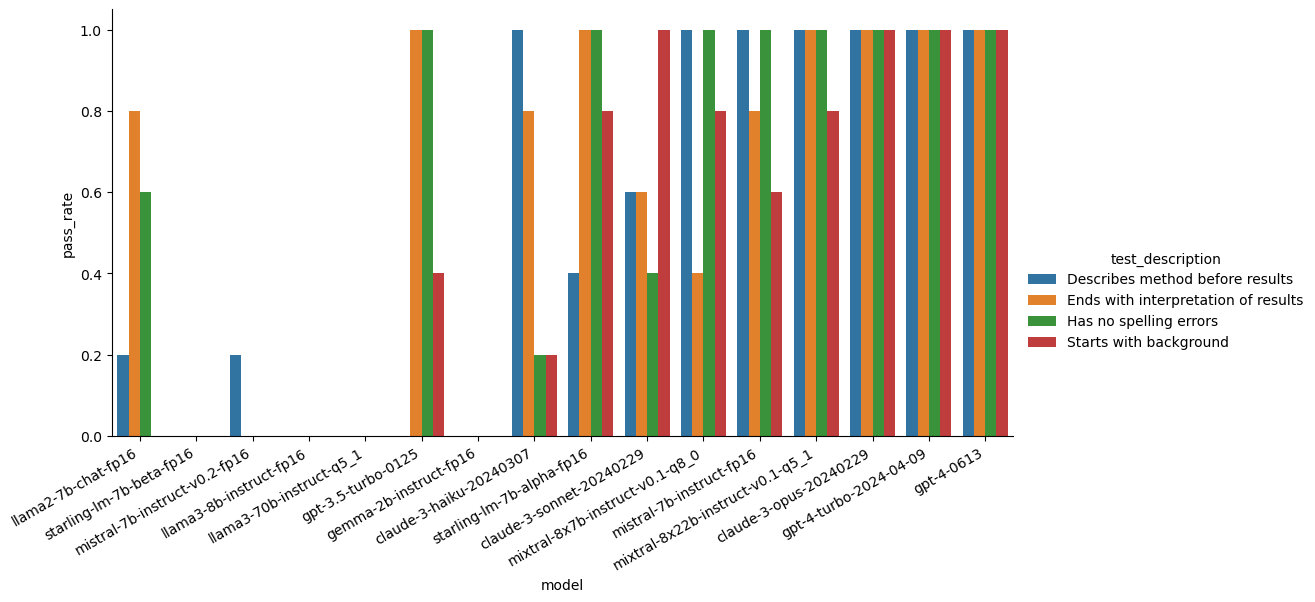

In [61]:
g = sns.catplot(
    data=pass_rate,
    x="model",
    y="pass_rate",
    hue="test_description",
    kind="bar",
    order=sorted_models,
    errorbar=None,
    aspect=2,
)
g.set_xticklabels(rotation=30, ha="right")

# Plot: score

In [62]:
results

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting
...,...,...,...,...,...,...,...,...,...,...
6715,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,False,0.00,Failed,Is a single paragraph,Formatting
6716,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,Doesn't include manuscript title,Formatting
6717,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting
6718,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,Has roughly the same length as input,Formatting


## Prompt: `candidate_with_metadata`

In [63]:
df = results[
    results["prompt"].isin(("candidate_with_metadata",))
]  # .groupby(["model"])["score_avg"].sum().to_frame()

In [64]:
df.shape

(2240, 10)

In [65]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
7,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
8,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
9,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
10,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
11,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting


In [66]:
df.groupby("model")["score_avg"].mean().sort_values()

model
gemma-2b-instruct-fp16              0.310714
llama3-8b-instruct-fp16             0.351786
llama2-7b-chat-fp16                 0.375000
gpt-3.5-turbo-0125                  0.383929
llama3-70b-instruct-q5_1            0.389286
starling-lm-7b-beta-fp16            0.416071
mistral-7b-instruct-v0.2-fp16       0.439286
claude-3-haiku-20240307             0.451786
starling-lm-7b-alpha-fp16           0.478571
mistral-7b-instruct-fp16            0.482143
claude-3-sonnet-20240229            0.483929
mixtral-8x7b-instruct-v0.1-q8_0     0.491071
mixtral-8x22b-instruct-v0.1-q5_1    0.498214
claude-3-opus-20240229              0.500000
gpt-4-0613                          0.500000
gpt-4-turbo-2024-04-09              0.500000
Name: score_avg, dtype: float64

In [67]:
sorted_models = (
    df.groupby("model")["score_avg"]
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)

In [68]:
sorted_models[-5:]

['mixtral-8x7b-instruct-v0.1-q8_0',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09']

In [69]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [70]:
# sorted_models[-5:]

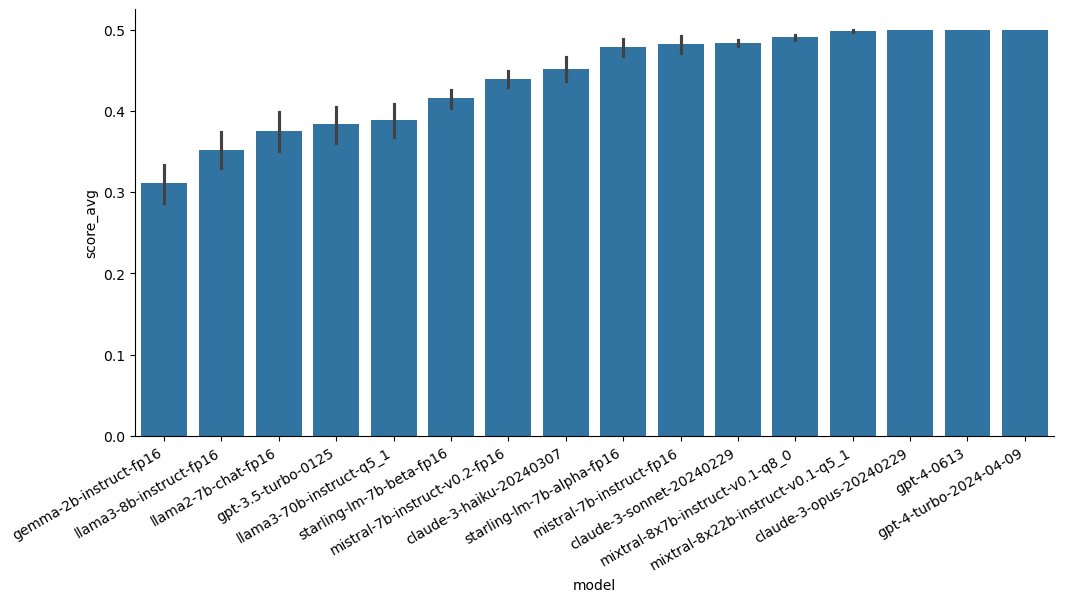

In [71]:
g = sns.catplot(
    data=df,
    x="model",
    y="score_avg",
    # hue="prompt",
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    aspect=2,
)
g.set_xticklabels(rotation=30, ha="right")

## Prompt: `candidate`

In [72]:
df = results[
    results["prompt"].isin(("candidate",))
]  # .groupby(["model"])["score_avg"].sum().to_frame()

In [73]:
df.shape

(2240, 10)

In [74]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
14,claude-3-haiku-20240307,True,0.5,candidate,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
15,claude-3-haiku-20240307,True,0.5,candidate,Has no spelling errors,True,0.25,Passed,Ends with a period,Formatting
16,claude-3-haiku-20240307,True,0.5,candidate,Has no spelling errors,True,0.25,Passed,Is a single paragraph,Formatting
17,claude-3-haiku-20240307,True,0.5,candidate,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
18,claude-3-haiku-20240307,True,0.5,candidate,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting


In [75]:
df.groupby("model")["score_avg"].mean().sort_values()

model
gemma-2b-instruct-fp16              0.296429
llama3-8b-instruct-fp16             0.380357
mistral-7b-instruct-fp16            0.387500
llama3-70b-instruct-q5_1            0.389286
llama2-7b-chat-fp16                 0.394643
gpt-3.5-turbo-0125                  0.400000
mistral-7b-instruct-v0.2-fp16       0.408929
starling-lm-7b-beta-fp16            0.421429
starling-lm-7b-alpha-fp16           0.428571
claude-3-haiku-20240307             0.471429
claude-3-sonnet-20240229            0.483929
mixtral-8x7b-instruct-v0.1-q8_0     0.498214
claude-3-opus-20240229              0.500000
gpt-4-0613                          0.500000
gpt-4-turbo-2024-04-09              0.500000
mixtral-8x22b-instruct-v0.1-q5_1    0.500000
Name: score_avg, dtype: float64

In [76]:
sorted_models = (
    df.groupby("model")["score_avg"]
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)

In [77]:
sorted_models[-5:]

['mixtral-8x7b-instruct-v0.1-q8_0',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q5_1']

In [78]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [79]:
# sorted_models[-5:]

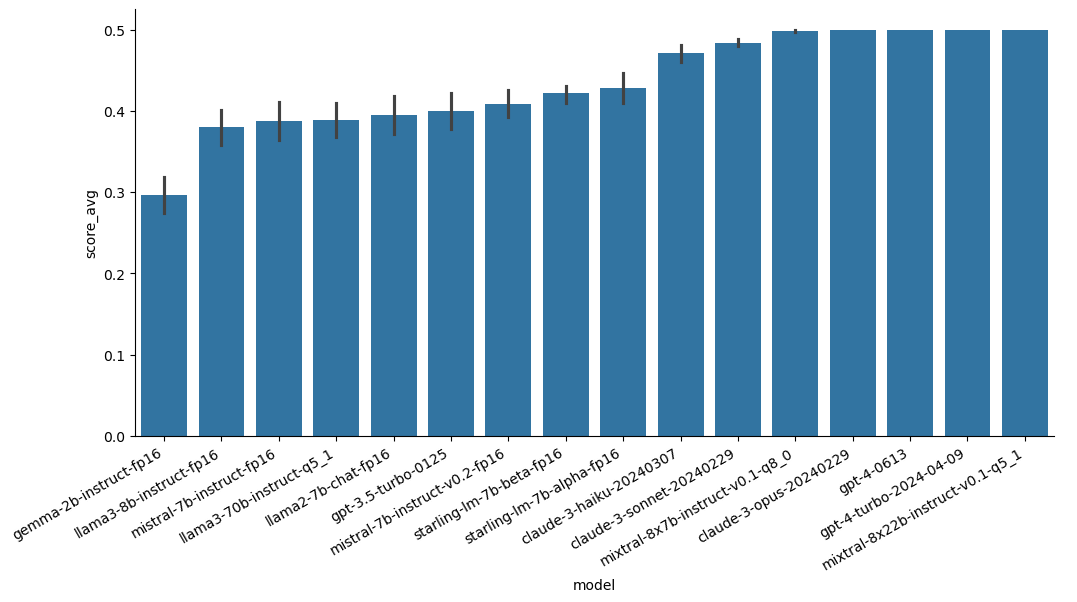

In [80]:
g = sns.catplot(
    data=df,
    x="model",
    y="score_avg",
    # hue="prompt",
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    aspect=2,
)
g.set_xticklabels(rotation=30, ha="right")

# Plot: comp_score

In [81]:
results

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting
...,...,...,...,...,...,...,...,...,...,...
6715,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,False,0.00,Failed,Is a single paragraph,Formatting
6716,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,Doesn't include manuscript title,Formatting
6717,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting
6718,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,Has roughly the same length as input,Formatting


## Prompt: `candidate_with_metadata`

In [82]:
df = results[
    results["prompt"].isin(("candidate_with_metadata",))
]  # .groupby(["model"])["score_avg"].sum().to_frame()

In [83]:
df.shape

(2240, 10)

In [84]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
7,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
8,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
9,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
10,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
11,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting


In [85]:
df.groupby("model")["comp_score"].mean().sort_values()

model
gemma-2b-instruct-fp16              0.310714
llama3-8b-instruct-fp16             0.351786
llama2-7b-chat-fp16                 0.375000
gpt-3.5-turbo-0125                  0.383929
llama3-70b-instruct-q5_1            0.389286
starling-lm-7b-beta-fp16            0.416071
mistral-7b-instruct-v0.2-fp16       0.439286
claude-3-haiku-20240307             0.451786
starling-lm-7b-alpha-fp16           0.478571
mistral-7b-instruct-fp16            0.482143
claude-3-sonnet-20240229            0.483929
mixtral-8x7b-instruct-v0.1-q8_0     0.491071
mixtral-8x22b-instruct-v0.1-q5_1    0.498214
claude-3-opus-20240229              0.500000
gpt-4-0613                          0.500000
gpt-4-turbo-2024-04-09              0.500000
Name: comp_score, dtype: float64

In [86]:
sorted_models = (
    df.groupby("model")["comp_score"]
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)

In [87]:
sorted_models[-5:]

['mixtral-8x7b-instruct-v0.1-q8_0',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09']

In [88]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [89]:
df.loc[df["comp_type"] == "Formatting", "comp_score"] = (
    df.loc[df["comp_type"] == "Formatting", "comp_score"] / 0.25
)
df.loc[df["comp_type"] == "Spelling/grammar", "comp_score"] = (
    df.loc[df["comp_type"] == "Spelling/grammar", "comp_score"] / 2.0
)
df.loc[df["comp_type"] == "Structure", "comp_score"] = (
    df.loc[df["comp_type"] == "Structure", "comp_score"] / 2.0
)

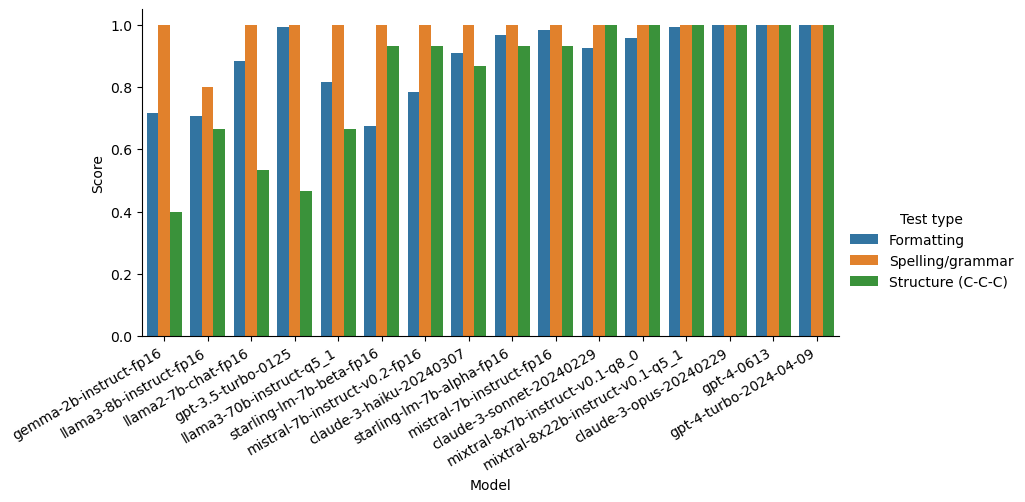

In [90]:
g = sns.catplot(
    data=df,
    x="model",
    y="comp_score",
    hue="comp_type",
    kind="bar",
    order=sorted_models,
    errorbar=None,
    height=4,
    aspect=2,
    legend_out=True,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Score")

# leg = g.axes.flat[0].get_legend()
# leg.set_title("")
g._legend.set_title("Test type")
new_labels = ["Formatting", "Spelling/grammar", "Structure (C-C-C)"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

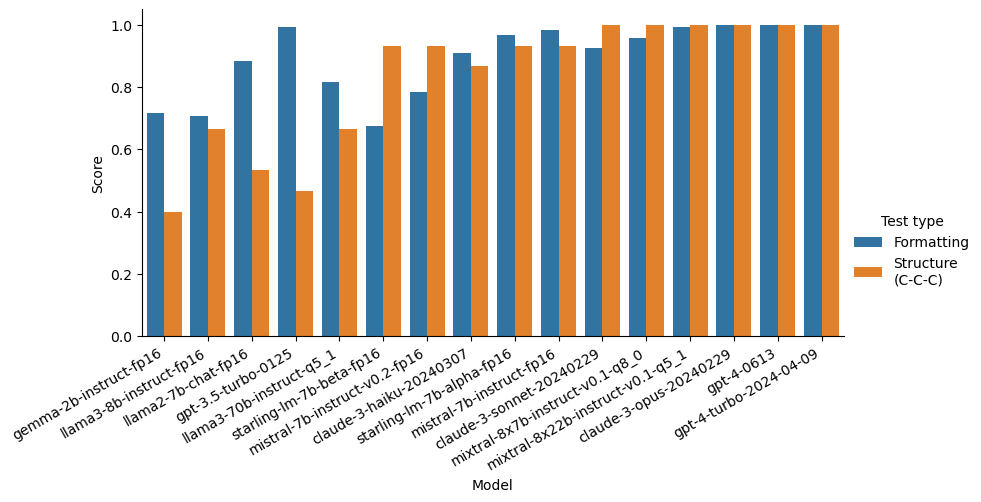

In [91]:
g = sns.catplot(
    data=df,
    x="model",
    y="comp_score",
    hue="comp_type",
    kind="bar",
    order=sorted_models,
    hue_order=["Formatting", "Structure"],
    errorbar=None,
    height=4,
    aspect=2,
    legend_out=True,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Score")

# leg = g.axes.flat[0].get_legend()
# leg.set_title("")
g._legend.set_title("Test type")
new_labels = ["Formatting", "Structure\n(C-C-C)"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)